In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('StudentsPerformance.csv',header=0,sep=',')

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df=df.replace(['female','male'],[0,1])
df=df.replace(['group A','group B','group C','group D','group E'],[0,1,2,3,4])
df=df.replace(['master\'s degree','bachelor\'s degree','some college','associate\'s degree',
               'high school','some high school'],[0,1,2,3,4,5])
df=df.replace(['standard','free/reduced'],[0,1])
df=df.replace(['none','completed'],[0,1])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,0,0,72,72,74
1,0,2,2,0,1,69,90,88
2,0,1,0,0,0,90,95,93
3,1,0,3,1,0,47,57,44
4,1,2,2,0,0,76,78,75


In [7]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.915000,0.355000,0.358000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.461476,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,3.000000,0.000000,0.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


In [8]:
import seaborn as sns

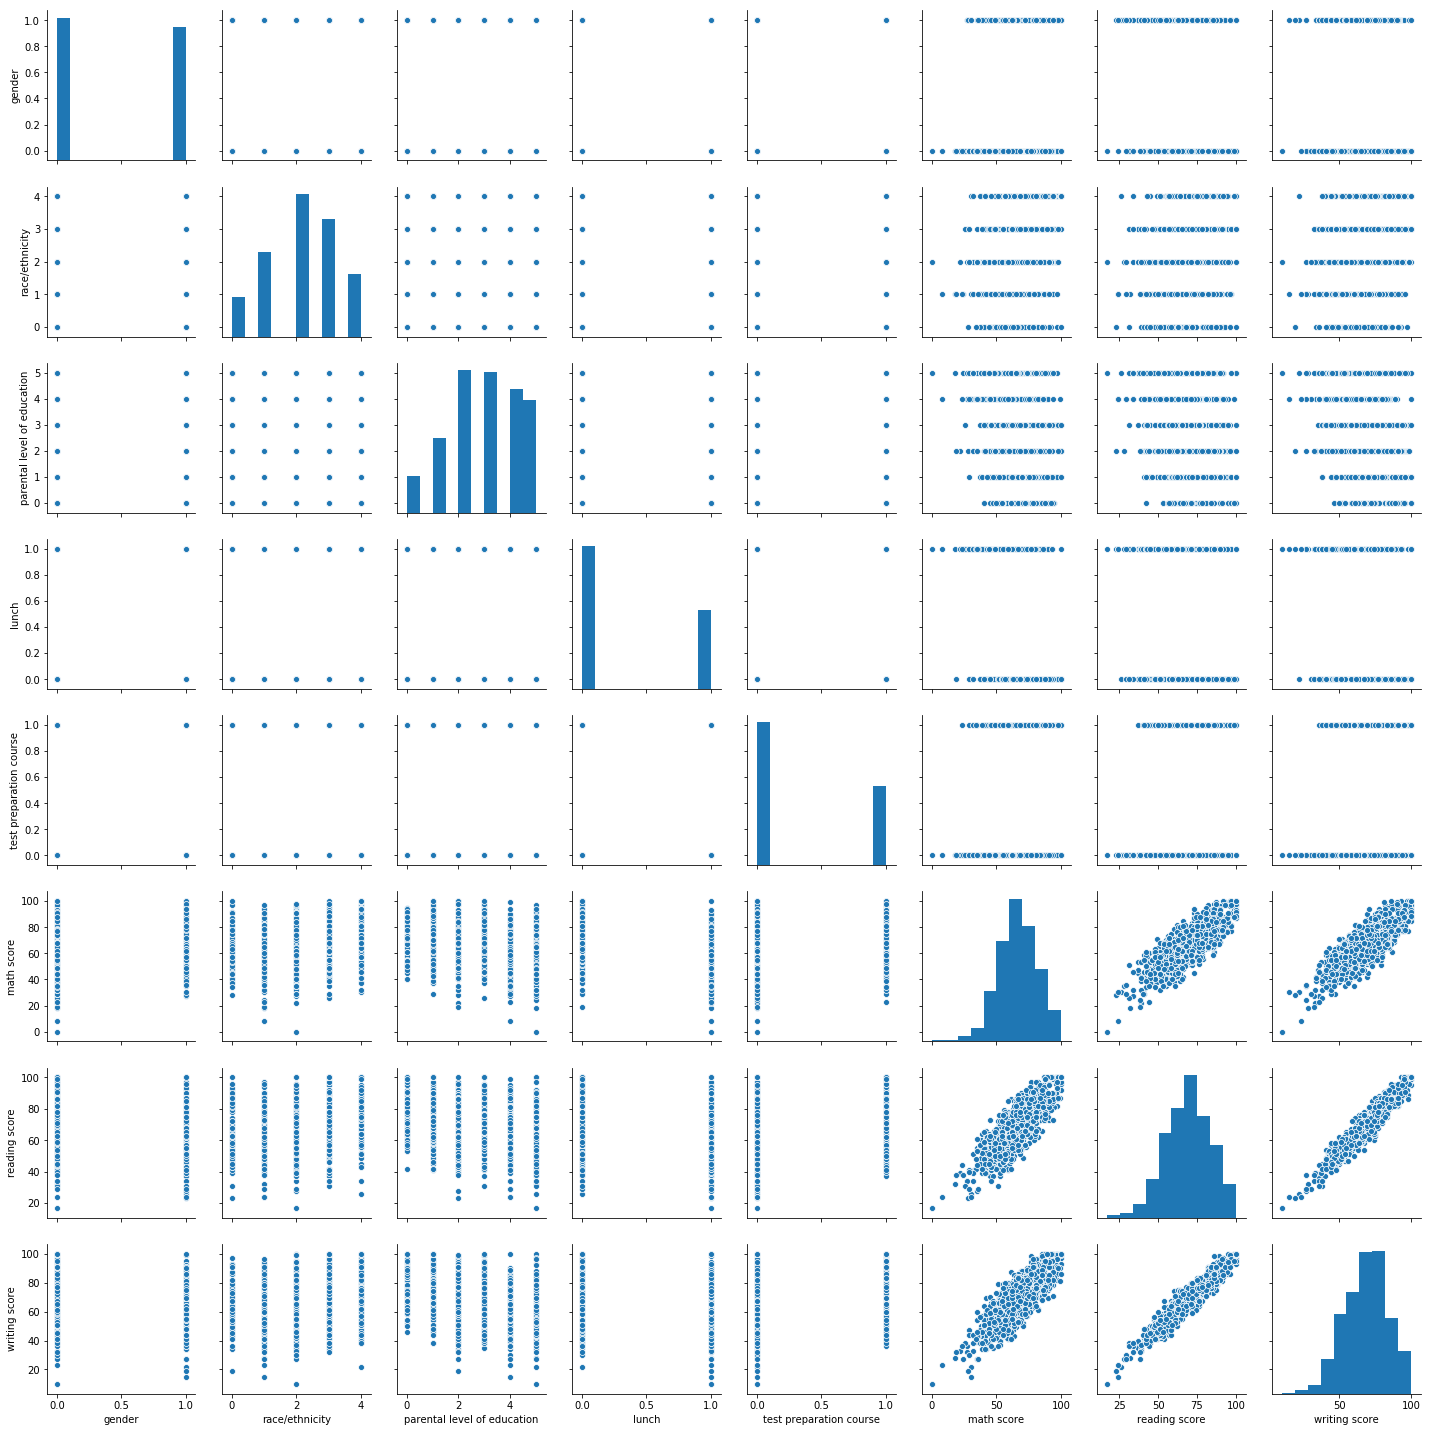

In [9]:
sns.pairplot(df,palette='rainbow')

In [10]:
df['average']=((df['math score']+df['reading score']+df['writing score'])/3).astype(int)

d:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


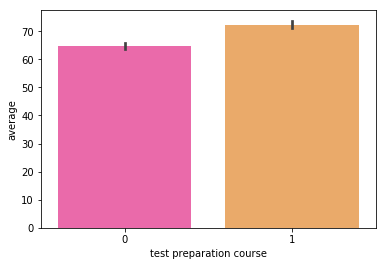

In [11]:
sns.barplot(x='test preparation course',y=df['average'],data=df,palette='spring')

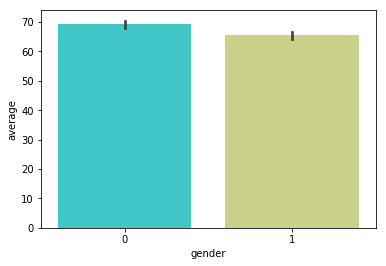

In [12]:
sns.barplot(x='gender',y='average',data=df,palette='rainbow')

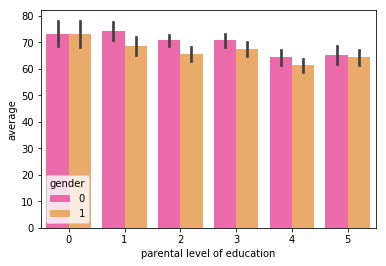

In [13]:
sns.barplot(x='parental level of education',y='average',hue='gender',data=df,palette='spring')

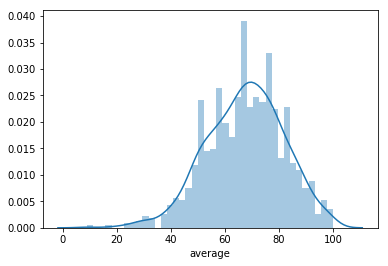

In [14]:
sns.distplot(df['average'],bins=40)

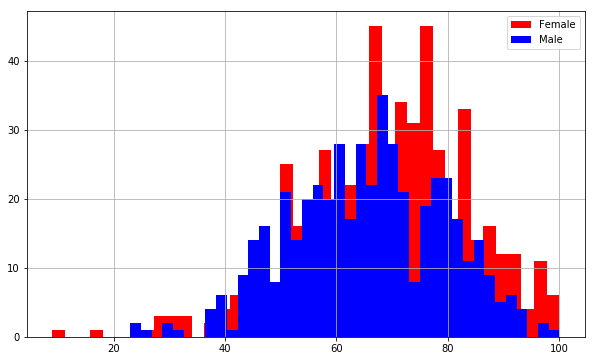

In [15]:
fig=plt.figure(figsize=(10,6))
(df['average'][df['gender']==0]).hist(bins=40,label='Female',color='red')
(df['average'][df['gender']==1]).hist(bins=40,label='Male',color='blue')
plt.legend()

In [20]:
df.drop(columns=['math score','reading score','writing score'],inplace=True)

In [16]:
isinstance?

In [22]:
import numpy as np
grade=np.zeros(1000,dtype=np.str)

In [23]:
for i,score in enumerate(df['average']):
    if df.iloc[i,-1]>=90: grade[i]="A"
    elif df.iloc[i,-1]>=80:grade[i]="B"
    elif df.iloc[i,-1]>=70:grade[i]="C"
    elif df.iloc[i,-1]>=60:grade[i]='D'
    else:grade[i]='F'

In [24]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='average')
X_train, X_test, y_train, y_test = train_test_split(X, grade, test_size=0.2, random_state=42)

In [48]:
X_train=X_train.as_matrix()
X_test=X_test.as_matrix()

AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

d:\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [50]:
np.sum((clf.predict(X_test)==y_test))

51